<h1>Treasury Bond Seasonality Effects</h1>

<h3>A quick analysis on turn of the month effects in iShares 20+ Year Treasury Bond ETF (TLT)</h3>

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_ohlc(symbol, start_date, end_date):
    """
    Get adjusted OHLC prices for a given symbol
    Matches the R quantmod function
    """
    # Download data with auto_adjust=False to get Adj Close
    data = yf.download(symbol, start=start_date, end=end_date,
                       auto_adjust=False, progress=False)

    # Handle multi-index columns
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    # Reset index to make Date a column
    data_df = data.reset_index()

    # Rename columns to lowercase
    data_df.columns = [str(col).lower().replace(' ', '_') for col in data_df.columns]

    # Rename adj_close
    if 'adj_close' in data_df.columns:
        pass
    elif 'adjclose' in data_df.columns:
        data_df = data_df.rename(columns={'adjclose': 'adj_close'})

    # Reorder columns to match standard OHLC format
    column_order = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
    data_df = data_df[column_order]

    return data_df

# Get TLT data 
tlt_data = get_ohlc('TLT', '1999-01-01', '2030-01-01')

# Round price columns to 2 decimals
price_cols = ['open', 'high', 'low', 'close', 'adj_close']
tlt_data[price_cols] = tlt_data[price_cols].round(2)


In [73]:
tlt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5870 non-null   datetime64[ns]
 1   open       5870 non-null   float64       
 2   high       5870 non-null   float64       
 3   low        5870 non-null   float64       
 4   close      5870 non-null   float64       
 5   adj_close  5870 non-null   float64       
 6   volume     5870 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 321.1 KB


In [74]:
tlt_data.head()

,date,open,high,low,close,adj_close,volume
0,2002-07-30,81.75,81.90,81.52,81.52,36.92,6100
1,2002-07-31,81.95,82.80,81.90,82.53,37.38,29400
2,2002-08-01,82.54,83.02,82.54,83.00,37.59,25000
3,2002-08-02,83.16,84.10,82.88,83.85,37.98,52800
4,2002-08-05,84.04,84.44,83.85,84.22,38.15,61100


In [75]:
tlt_data.tail()

,date,open,high,low,close,adj_close,volume
5865,2025-11-18,89.35,89.45,88.80,89.06,89.06,31967400
5866,2025-11-19,89.23,89.31,88.85,88.88,88.88,25782400
5867,2025-11-20,88.99,89.42,88.99,89.23,89.23,32945000
5868,2025-11-21,89.65,89.67,89.20,89.50,89.50,41938600
5869,2025-11-24,89.95,90.07,89.78,90.01,90.01,30703400


<h3>Plot time series of close prices, to see how the data looks</h3>

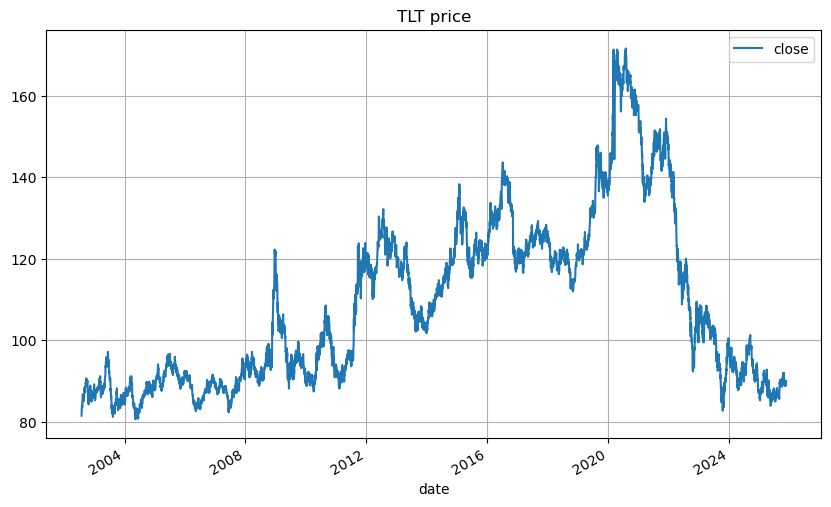

In [76]:
tlt_data.plot(x = "date", y = "close", figsize = (10, 6), title = "TLT price")
plt.grid(True)

<h3>Plot time series of adjusted(accounting for dividends) close prices.</h3>

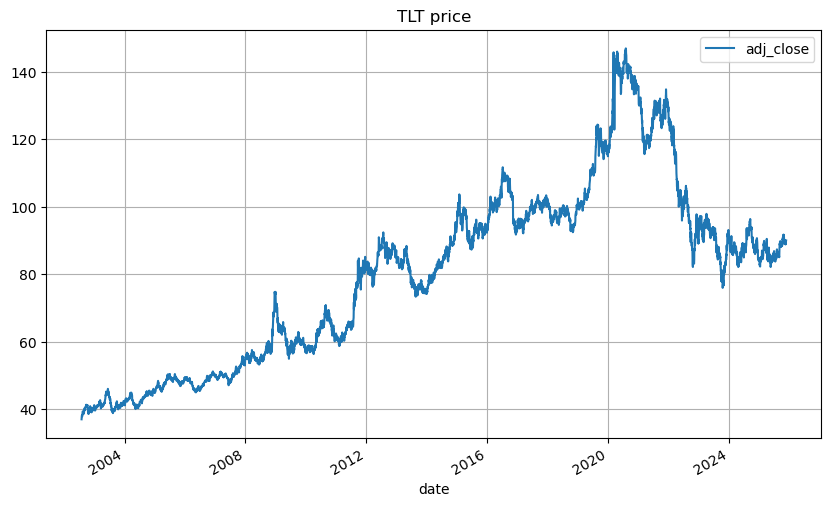

In [77]:
tlt_data.plot(x = "date", y = "adj_close", figsize = (10, 6), title = "TLT price")
plt.grid(True)

<h3>Calculate daily log returns</h3>

In [55]:
tlt_data['logreturns'] = np.log(tlt_data['adj_close']).diff()

tlt_data.head(6)

,date,open,high,low,close,adj_close,volume,logreturns
0,2002-07-30,81.75,81.90,81.52,81.52,36.92,6100,NaN
1,2002-07-31,81.95,82.80,81.90,82.53,37.38,29400,0.012382
2,2002-08-01,82.54,83.02,82.54,83.00,37.59,25000,0.005602
3,2002-08-02,83.16,84.10,82.88,83.85,37.98,52800,0.010322
4,2002-08-05,84.04,84.44,83.85,84.22,38.15,61100,0.004466
5,2002-08-06,83.87,83.90,83.22,83.50,37.82,64900,-0.008688


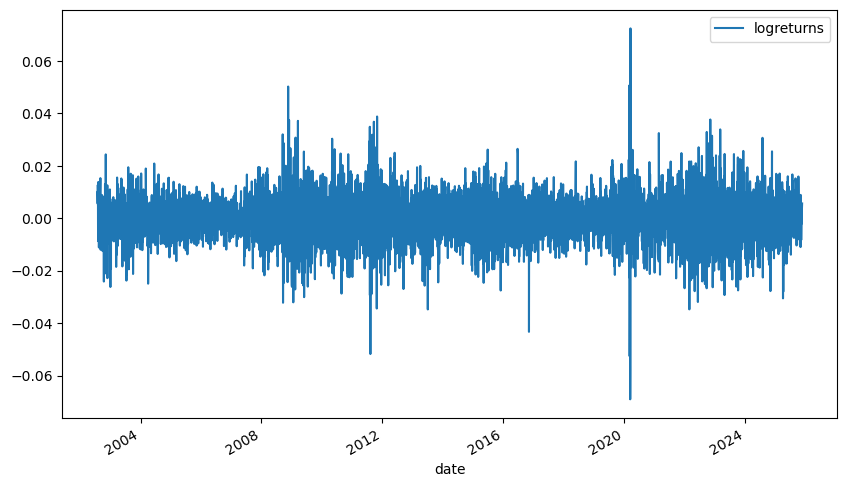

In [56]:
tlt_data.plot(x='date', y='logreturns', figsize = (10, 6), kind='line')
plt.show()

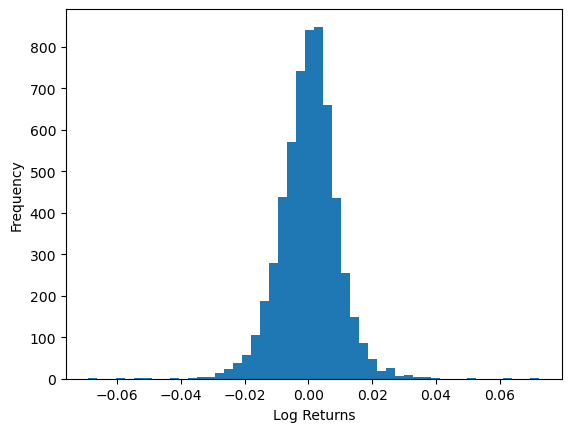

In [57]:
tlt_data['logreturns'].plot.hist(bins=50)
plt.xlabel('Log Returns')
plt.show()

<h3>Add day of the month</h3>

In [59]:
tlt_data['dom'] = tlt_data['date'].dt.day

tlt_data.head()

,date,open,high,low,close,adj_close,volume,logreturns,dom
0,2002-07-30,81.75,81.90,81.52,81.52,36.92,6100,NaN,30
1,2002-07-31,81.95,82.80,81.90,82.53,37.38,29400,0.012382,31
2,2002-08-01,82.54,83.02,82.54,83.00,37.59,25000,0.005602,1
3,2002-08-02,83.16,84.10,82.88,83.85,37.98,52800,0.010322,2
4,2002-08-05,84.04,84.44,83.85,84.22,38.15,61100,0.004466,5


<h3>Group by day of the month and calculate mean returns</h3>

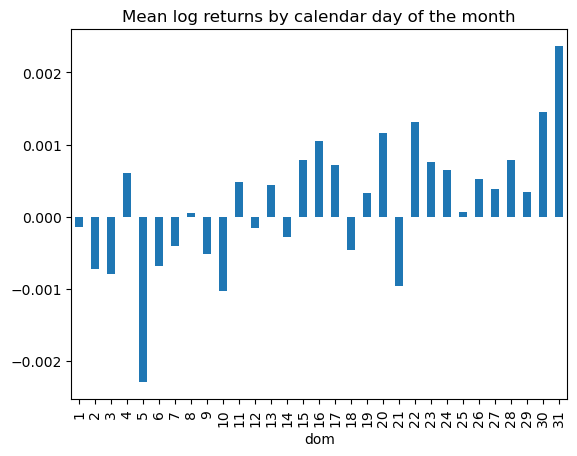

In [61]:
tlt_data.dropna().groupby('dom')['logreturns'].mean().plot(kind='bar')
plt.title('Mean log returns by calendar day of the month')
plt.show()

In [62]:
tlt_data.head()

,date,open,high,low,close,adj_close,volume,logreturns,dom
0,2002-07-30,81.75,81.90,81.52,81.52,36.92,6100,NaN,30
1,2002-07-31,81.95,82.80,81.90,82.53,37.38,29400,0.012382,31
2,2002-08-01,82.54,83.02,82.54,83.00,37.59,25000,0.005602,1
3,2002-08-02,83.16,84.10,82.88,83.85,37.98,52800,0.010322,2
4,2002-08-05,84.04,84.44,83.85,84.22,38.15,61100,0.004466,5


<h3>Does trading day of the month looks markedly different?</h3>

In [64]:
# Create start of month column
tlt_data['som'] = tlt_data['date'].dt.to_period('M').dt.to_timestamp()

# Sort by date
tlt_data = tlt_data.sort_values('date')

# Create trading day of month (number within each month)
tlt_data['tdom'] = tlt_data.groupby('som').cumcount() + 1

In [65]:
tlt_data.head()

,date,open,high,low,close,adj_close,volume,logreturns,dom,som,tdom
0,2002-07-30,81.75,81.90,81.52,81.52,36.92,6100,NaN,30,2002-07-01,1
1,2002-07-31,81.95,82.80,81.90,82.53,37.38,29400,0.012382,31,2002-07-01,2
2,2002-08-01,82.54,83.02,82.54,83.00,37.59,25000,0.005602,1,2002-08-01,1
3,2002-08-02,83.16,84.10,82.88,83.85,37.98,52800,0.010322,2,2002-08-01,2
4,2002-08-05,84.04,84.44,83.85,84.22,38.15,61100,0.004466,5,2002-08-01,3


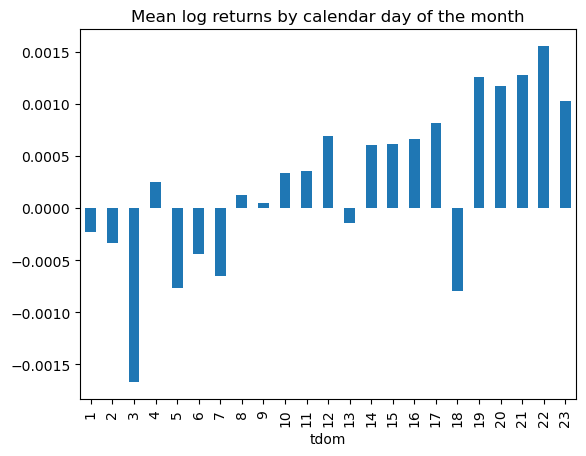

In [66]:
tlt_data.dropna().groupby('tdom')['logreturns'].mean().plot(kind='bar')
plt.title('Mean log returns by calendar day of the month')
plt.show()

<h3>How stable is this effect over time?</h3>

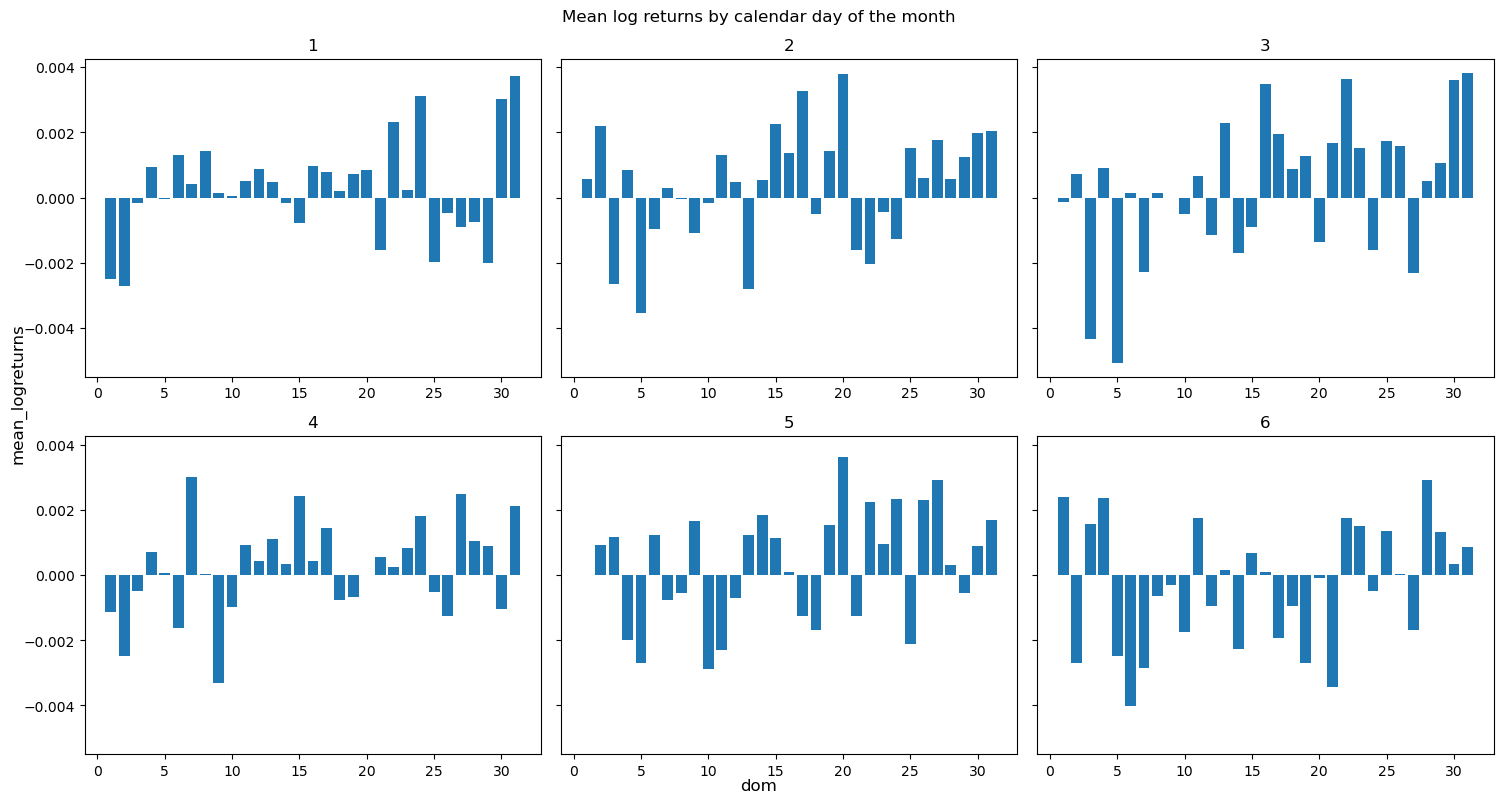

In [68]:
# Create 6 date buckets
tlt_data['date_bucket'] = pd.qcut(tlt_data['date'].rank(method='first'), q=6, labels=[1,2,3,4,5,6])

# Calculate mean returns
grouped = tlt_data.dropna().groupby(['dom', 'date_bucket'], observed=False)['logreturns'].mean().reset_index()

# Create 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for i, bucket in enumerate([1,2,3,4,5,6]):
    data = grouped[grouped['date_bucket'] == bucket]
    axes[i].bar(data['dom'], data['logreturns'])
    axes[i].set_title(f'{bucket}')

# Add labels (moved y-label to the right)
fig.text(0.5, 0.004, 'dom', ha='center', fontsize=12)
fig.text(0.001, 0.5, 'mean_logreturns', va='center', rotation='vertical', fontsize=12)  # Changed from 0.04 to 0.08
plt.suptitle('Mean log returns by calendar day of the month')
plt.tight_layout()
plt.show()

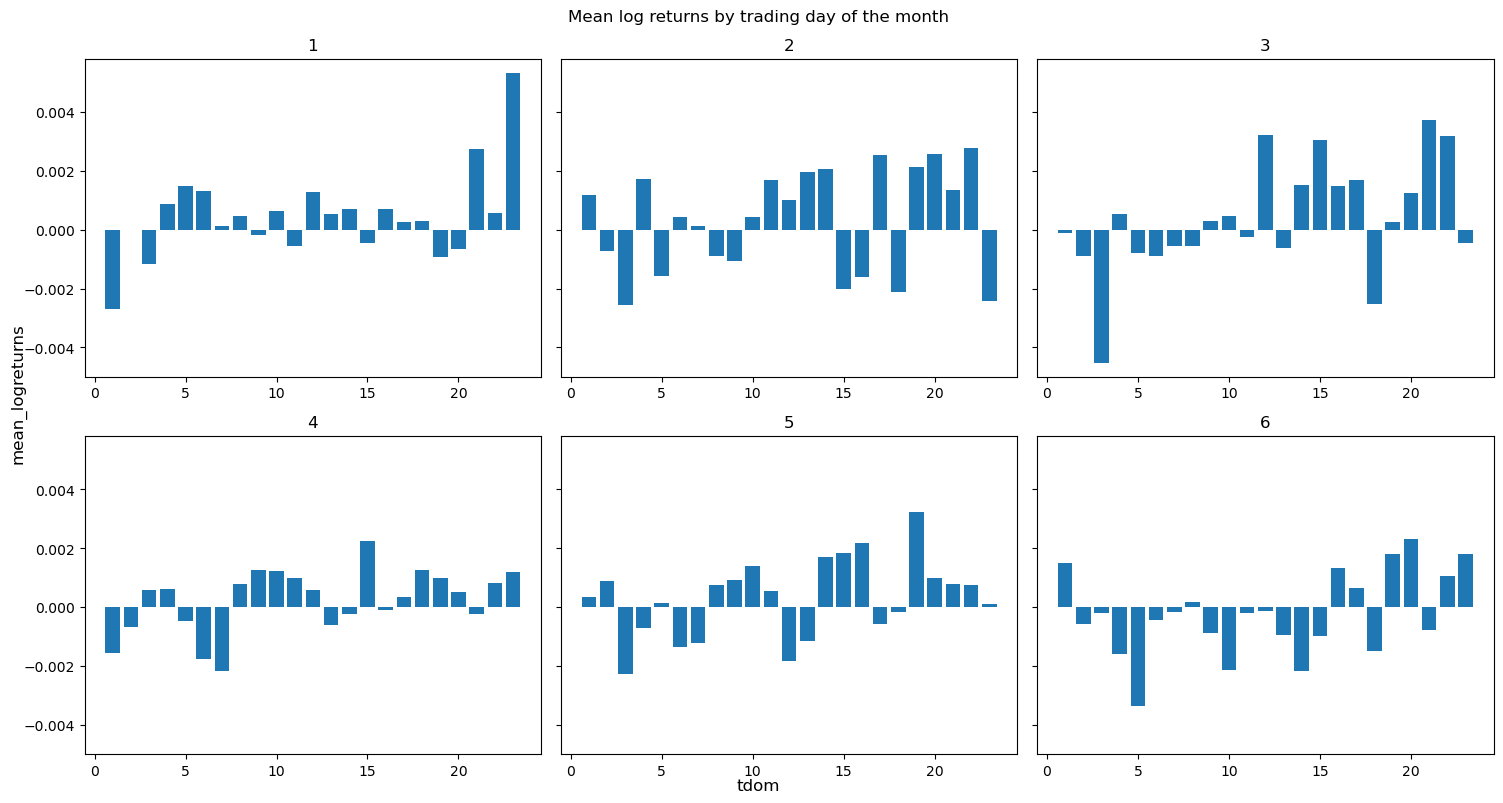

In [69]:
# Create 6 date buckets
tlt_data['date_bucket'] = pd.qcut(tlt_data['date'].rank(method='first'), q=6, labels=[1,2,3,4,5,6])

# Calculate mean returns
grouped = tlt_data.dropna().groupby(['tdom', 'date_bucket'], observed=False)['logreturns'].mean().reset_index()

# Create 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for i, bucket in enumerate([1,2,3,4,5,6]):
    data = grouped[grouped['date_bucket'] == bucket]
    axes[i].bar(data['tdom'], data['logreturns'])
    axes[i].set_title(f'{bucket}')

# Add labels (moved y-label to the right)
fig.text(0.5, 0.004, 'tdom', ha='center', fontsize=12)
fig.text(0.001, 0.5, 'mean_logreturns', va='center', rotation='vertical', fontsize=12)  # Changed from 0.04 to 0.08
plt.suptitle('Mean log returns by trading day of the month')
plt.tight_layout()
plt.show()

<h3>Look it by year to get a sense of how noisy the effect is.</h3>

Plotting 24 years in a 3x8 grid


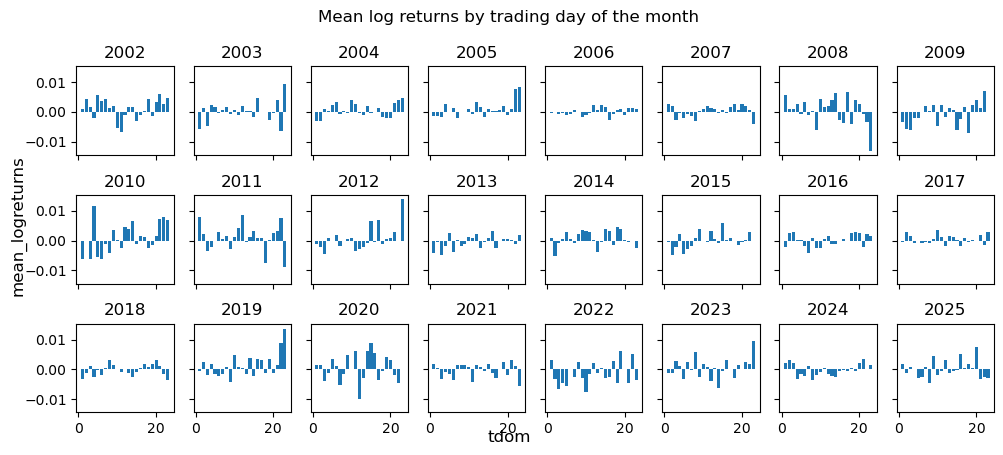

In [71]:
# Extract year
tlt_data['year'] = tlt_data['date'].dt.year

# Calculate mean returns by tdom and year
grouped = tlt_data.dropna().groupby(['tdom', 'year'], observed=False)['logreturns'].mean().reset_index()

# Get unique years and calculate grid size
years = sorted(grouped['year'].unique())
n_years = len(years)
n_cols = 8  # 4 columns per row
n_rows = -(-n_years // n_cols)  # Ceiling division (rounds up)

print(f"Plotting {n_years} years in a {n_rows}x{n_cols} grid")

# Create grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 1.5*n_rows), sharey=True, sharex=True)
axes = axes.flatten()

# Plot each year
for i, year in enumerate(years):
    data = grouped[grouped['year'] == year]
    axes[i].bar(data['tdom'], data['logreturns'])
    axes[i].set_title(f'{year}')

# Remove empty subplots
for j in range(n_years, len(axes)):
    fig.delaxes(axes[j])

# Add labels
fig.text(0.5, 0.02, 'tdom', ha='center', fontsize=12)
fig.text(0.001, 0.5, 'mean_logreturns', va='center', rotation='vertical', fontsize=12)
plt.suptitle('Mean log returns by trading day of the month')
plt.tight_layout()
plt.show()

<h3>Conclusion: Long-term Treasury bond returns show a visible, but noisy end-of-month pattern, with higher returns on the last days of the month followed by lower returns at the start of the next month.</h3>